# Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib import rcParams

## Transactional Data

In [2]:
df=pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
# DATE COL-
df['DATE'] = pd.to_datetime(df['DATE'], origin='1899-12-30', unit='D')

In [7]:
# PROD NAME COL-
df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [8]:
prod_name = df['PROD_NAME'].str.replace(r'[0-9]+[gG]','')

In [9]:
prod_name = prod_name.str.replace(r'&',' ')

In [10]:
prod_name

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream Onion 175g
4         Kettle Tortilla ChpsHny Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [11]:
all_words = ' '.join(prod_name).split()

In [12]:
all_words

['Natural',
 'Chip',
 'Compny',
 'SeaSalt175g',
 'CCs',
 'Nacho',
 'Cheese',
 '175g',
 'Smiths',
 'Crinkle',
 'Cut',
 'Chips',
 'Chicken',
 '170g',
 'Smiths',
 'Chip',
 'Thinly',
 'S/Cream',
 'Onion',
 '175g',
 'Kettle',
 'Tortilla',
 'ChpsHny',
 'Jlpno',
 'Chili',
 '150g',
 'Old',
 'El',
 'Paso',
 'Salsa',
 'Dip',
 'Tomato',
 'Mild',
 '300g',
 'Smiths',
 'Crinkle',
 'Chips',
 'Salt',
 'Vinegar',
 '330g',
 'Grain',
 'Waves',
 'Sweet',
 'Chilli',
 '210g',
 'Doritos',
 'Corn',
 'Chip',
 'Mexican',
 'Jalapeno',
 '150g',
 'Grain',
 'Waves',
 'Sour',
 'Cream',
 'Chives',
 '210G',
 'Smiths',
 'Crinkle',
 'Chips',
 'Salt',
 'Vinegar',
 '330g',
 'Kettle',
 'Sensations',
 'Siracha',
 'Lime',
 '150g',
 'Twisties',
 'Cheese',
 '270g',
 'WW',
 'Crinkle',
 'Cut',
 'Chicken',
 '175g',
 'Thins',
 'Chips',
 'Light',
 'Tangy',
 '175g',
 'CCs',
 'Original',
 '175g',
 'Burger',
 'Rings',
 '220g',
 'NCC',
 'Sour',
 'Cream',
 'Garden',
 'Chives',
 '175g',
 'Doritos',
 'Corn',
 'Chip',
 'Southern',
 'Chicke

In [13]:
# 'SALSA PRODUCTS'-
df['SALSA'] = df['PROD_NAME'].str.contains('salsa', case=False)

In [14]:
df = df[df['SALSA'] == False]

In [15]:
df = df.drop(columns='SALSA')

In [16]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [17]:
# SUMMARIES FOR TRANSACTIONAL DATA-
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


The mean product quantity is 1.91, but the maximum is 200. A quantity of 200 seems like an outlier.

In [18]:
df[df['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer.
The customer might be buying chips for commercial purposes instead.
We'll remove this loyalty card number from further analysis.

In [19]:
outlier = df[df['PROD_QTY'] == 200]
outlier_cust_id = outlier['LYLTY_CARD_NBR'].iloc[0]
outlier_cust_id

np.int64(226000)

In [20]:
df = df[df['LYLTY_CARD_NBR'] != outlier_cust_id]

In [21]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [22]:
count = df.groupby(df['DATE'].dt.date).size().reset_index(name = 'COUNT')
count.shape

(364, 2)

In [23]:
df.sort_values(by='DATE')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
9161,2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4
155442,2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2
181349,2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
229948,2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0
104647,2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4
...,...,...,...,...,...,...,...,...
10254,2019-06-30,112,112141,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0
113220,2019-06-30,207,207155,205513,99,Pringles Sthrn FriedChicken 134g,2,7.4
229182,2019-06-30,10,10140,9882,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0
229015,2019-06-30,6,6258,6047,29,French Fries Potato Chips 175g,1,3.0


In [24]:
date_counts = df.groupby('DATE').size()
date_counts

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Length: 364, dtype: int64

In [25]:
pd.date_range(start='2018-07-01', end='2019-06-30').difference(date_counts.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

The missing date is Christmas day, a public holiday, so it is expected that there are no sales on this day.
Now we move onto creating other features such as the pack size, and checking this for any outliers.

In [26]:
df['PACK_SIZE'] = df['PROD_NAME'].str.extract(r'(\d+)').astype(float)

C:\Users\Amiteshwar Singh\AppData\Local\Temp\ipykernel_7452\1901664599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PACK_SIZE'] = df['PROD_NAME'].str.extract(r'(\d+)').astype(float)


In [27]:
df.sort_values(by='PACK_SIZE')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
259246,2019-03-08,20,20172,17144,38,Infuzions Mango Chutny Papadums 70g,1,2.40,70.0
259135,2019-02-05,16,16458,14571,38,Infuzions Mango Chutny Papadums 70g,1,2.40,70.0
258984,2019-02-23,9,9030,8391,38,Infuzions Mango Chutny Papadums 70g,2,4.80,70.0
258943,2018-11-07,6,6473,6281,38,Infuzions Mango Chutny Papadums 70g,2,4.80,70.0
259305,2018-09-24,22,22113,18261,38,Infuzions Mango Chutny Papadums 70g,2,4.80,70.0
...,...,...,...,...,...,...,...,...,...
145130,2019-01-25,175,175285,176546,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.80,380.0
145165,2018-12-08,175,175375,176903,4,Dorito Corn Chp Supreme 380g,2,13.00,380.0
145111,2019-05-10,175,175149,176010,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.80,380.0
41,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25,380.0


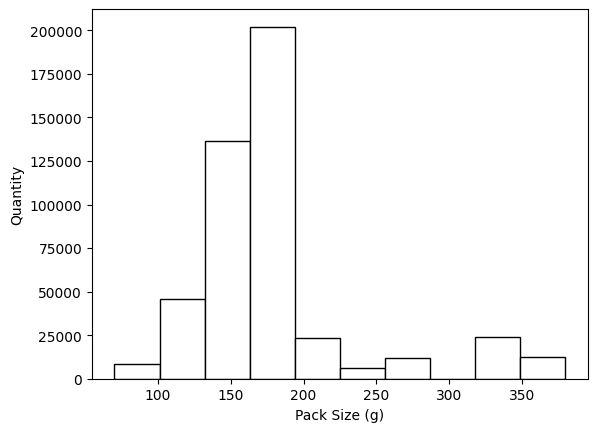

In [28]:
# MINIMUM PACK SIZE IS 70, WHILE MAXIMUM IS 380; WHICH IS REASONABLE.
plt.hist(data=df, x='PACK_SIZE', weights='PROD_QTY', color='white', edgecolor='black')
plt.ylabel('Quantity')
plt.xlabel('Pack Size (g)')
plt.show()

In [29]:
# BRAND NAMES-
df['BRAND_NAME'] = df['PROD_NAME'].str.split().str.get(0)

C:\Users\Amiteshwar Singh\AppData\Local\Temp\ipykernel_7452\3086845338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BRAND_NAME'] = df['PROD_NAME'].str.split().str.get(0)


In [30]:
df['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [31]:
def replace_brandname(line):
    name = line['BRAND_NAME']
    if name == "Infzns":
        return "Infuzions"
    elif name == "Red":
        return "Red Rock Deli"
    elif name == "RRD":
        return "Red Rock Deli"
    elif name == "Grain":
        return "Grain Waves"
    elif name == "GrnWves":
        return "Grain Waves"
    elif name == "Snbts":
        return "Sunbites"
    elif name == "Natural":
        return "Natural Chip Co"
    elif name == "NCC":
        return "Natural Chip Co"
    elif name == "WW":
        return "Woolworths"
    elif name == "Smith":
        return "Smiths"
    elif name == "Dorito":
        return "Doritos"
    else:
        return name

In [32]:
df["BRAND_NAME"] = df.apply(lambda line: replace_brandname(line), axis=1)

C:\Users\Amiteshwar Singh\AppData\Local\Temp\ipykernel_7452\2272393273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BRAND_NAME"] = df.apply(lambda line: replace_brandname(line), axis=1)


In [33]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos


## Customer Data

In [34]:
cust_df = pd.read_csv('QVI_purchase_behaviour.csv')

In [35]:
cust_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [36]:
cust_df = cust_df.rename(columns={'PREMIUM_CUSTOMER': 'MEMBER_TYPE'})

In [37]:
cust_df.isnull().sum()

LYLTY_CARD_NBR    0
LIFESTAGE         0
MEMBER_TYPE       0
dtype: int64

In [38]:
cust_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [39]:
cust_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [40]:
cust_df['MEMBER_TYPE'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

## Joining Datasets

In [41]:
complete_df = df.set_index('LYLTY_CARD_NBR').join(cust_df.set_index('LYLTY_CARD_NBR'))

In [42]:
complete_df = complete_df.reset_index()
complete_df = complete_df.sort_values(by='DATE').reset_index(drop=True)
complete_df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,MEMBER_TYPE
0,88140,2018-07-01,88,86914,25,Pringles SourCream Onion 134g,2,7.4,134.0,Pringles,MIDAGE SINGLES/COUPLES,Mainstream
1,60276,2018-07-01,60,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150.0,Kettle,RETIREES,Mainstream
2,199014,2018-07-01,199,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110.0,Infuzions,RETIREES,Premium
3,35052,2018-07-01,35,31630,11,RRD Pc Sea Salt 165g,1,3.0,165.0,Red Rock Deli,YOUNG SINGLES/COUPLES,Budget
4,72104,2018-07-01,72,71038,20,Doritos Cheese Supreme 330g,2,11.4,330.0,Doritos,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,112141,2019-06-30,112,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0,175.0,Natural Chip Co,MIDAGE SINGLES/COUPLES,Mainstream
246736,207155,2019-06-30,207,205513,99,Pringles Sthrn FriedChicken 134g,2,7.4,134.0,Pringles,OLDER SINGLES/COUPLES,Mainstream
246737,10140,2019-06-30,10,9882,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Budget
246738,6258,2019-06-30,6,6047,29,French Fries Potato Chips 175g,1,3.0,175.0,French,YOUNG SINGLES/COUPLES,Budget


In [43]:
# CHECKING FOR NULL VALUES AND EXPORTING THE DF-
complete_df.isnull().sum()

LYLTY_CARD_NBR    0
DATE              0
STORE_NBR         0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PACK_SIZE         0
BRAND_NAME        0
LIFESTAGE         0
MEMBER_TYPE       0
dtype: int64

In [44]:
complete_df.to_csv('QVI_complete_data.csv')

## Data Analysis on Customer Segments

- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is?
- How many customers are in each segment?
- How many chips are bought per customer by segment?
- What's the average chip price by customer segment?

In [45]:
# 1. Total sales by Lifestage and Member Type-
sales_by_segment = complete_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['TOT_SALES'].sum().reset_index()
sales_by_segment = sales_by_segment.sort_values(by='TOT_SALES', ascending=False)

In [46]:
sales_by_segment

,LIFESTAGE,MEMBER_TYPE,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


C:\Users\Amiteshwar Singh\AppData\Local\Temp\ipykernel_7452\737506809.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  sns.barplot(


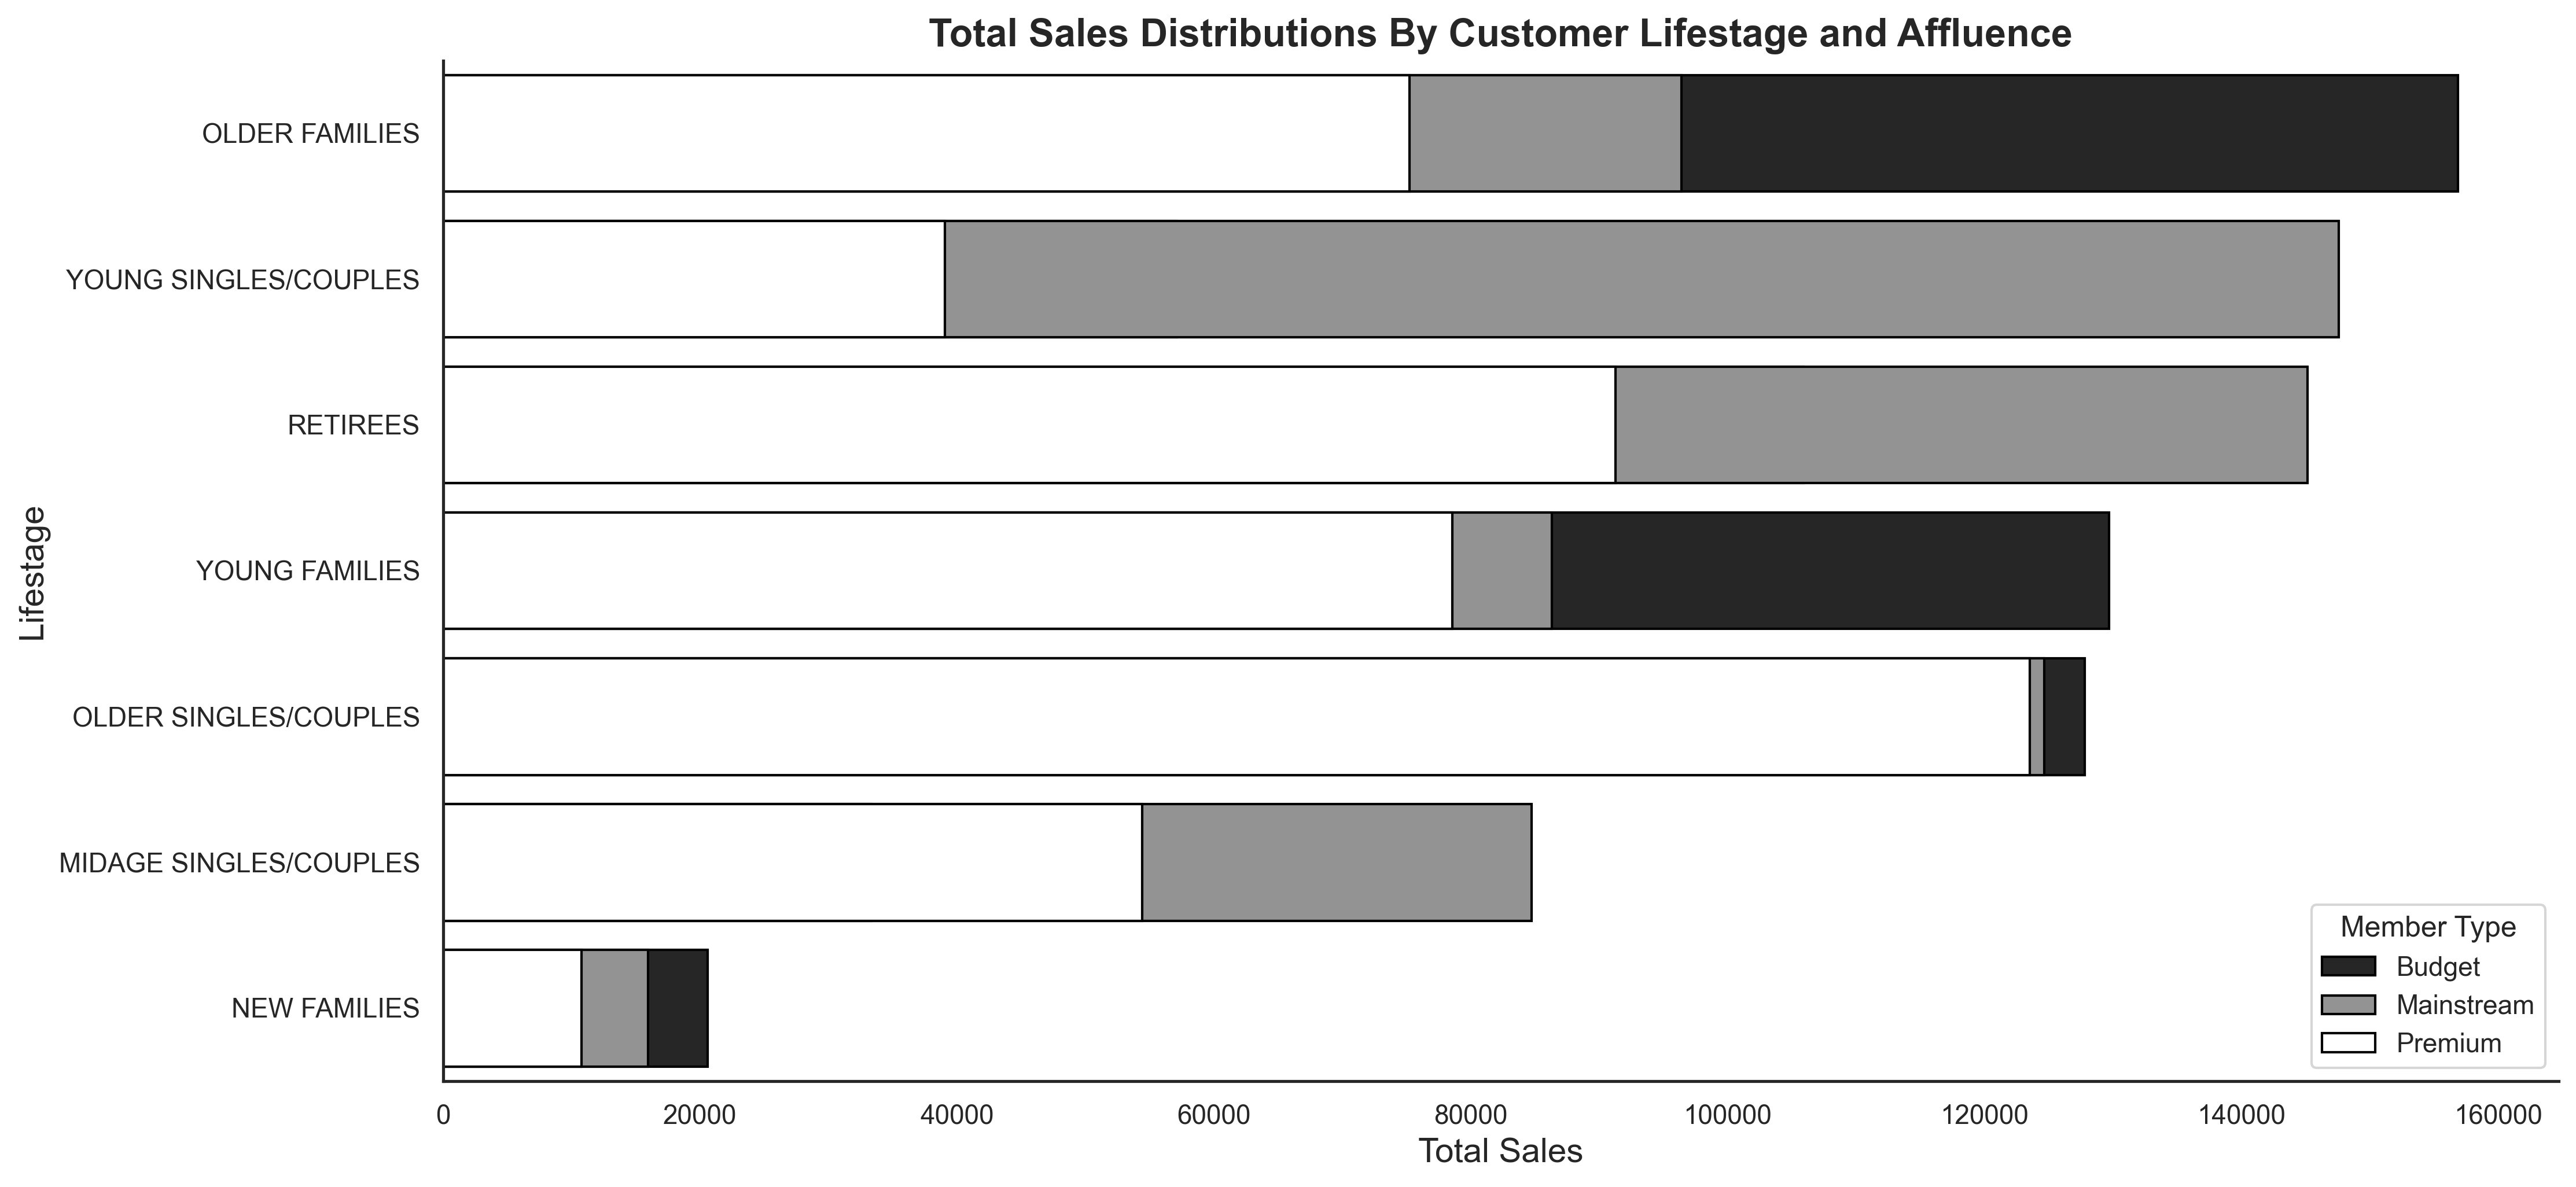

In [47]:
rcParams['font.family'] = 'Roboto'

sns.set(style="white")
plt.figure(figsize=[15, 7], dpi=300)
sns.barplot(
    data=sales_by_segment,
    x='TOT_SALES',
    y='LIFESTAGE',
    hue='MEMBER_TYPE',
    orient='h',
    dodge=False,
    color="white",
    edgecolor="black"
)
plt.title('Total Sales Distributions By Customer Lifestage and Affluence', fontweight='bold', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Lifestage', fontsize=14)
plt.legend(title='Member Type')
plt.tight_layout()
plt.savefig('sales_by_segment_bw.png')
sns.despine()
plt.show()

In [48]:
# 2. Number of customers in each segment-
customers_by_segment = complete_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['LYLTY_CARD_NBR'].nunique().reset_index()
customers_by_segment.rename(columns={'LYLTY_CARD_NBR': 'NUM_OF_CUSTOMERS'}, inplace=True)

In [49]:
customers_by_segment

,LIFESTAGE,MEMBER_TYPE,NUM_OF_CUSTOMERS
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,3298
2,MIDAGE SINGLES/COUPLES,Premium,2369
3,NEW FAMILIES,Budget,1087
4,NEW FAMILIES,Mainstream,830
5,NEW FAMILIES,Premium,575
6,OLDER FAMILIES,Budget,4611
7,OLDER FAMILIES,Mainstream,2788
8,OLDER FAMILIES,Premium,2231
9,OLDER SINGLES/COUPLES,Budget,4849


C:\Users\Amiteshwar Singh\AppData\Local\Temp\ipykernel_7452\4100011161.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  sns.barplot(


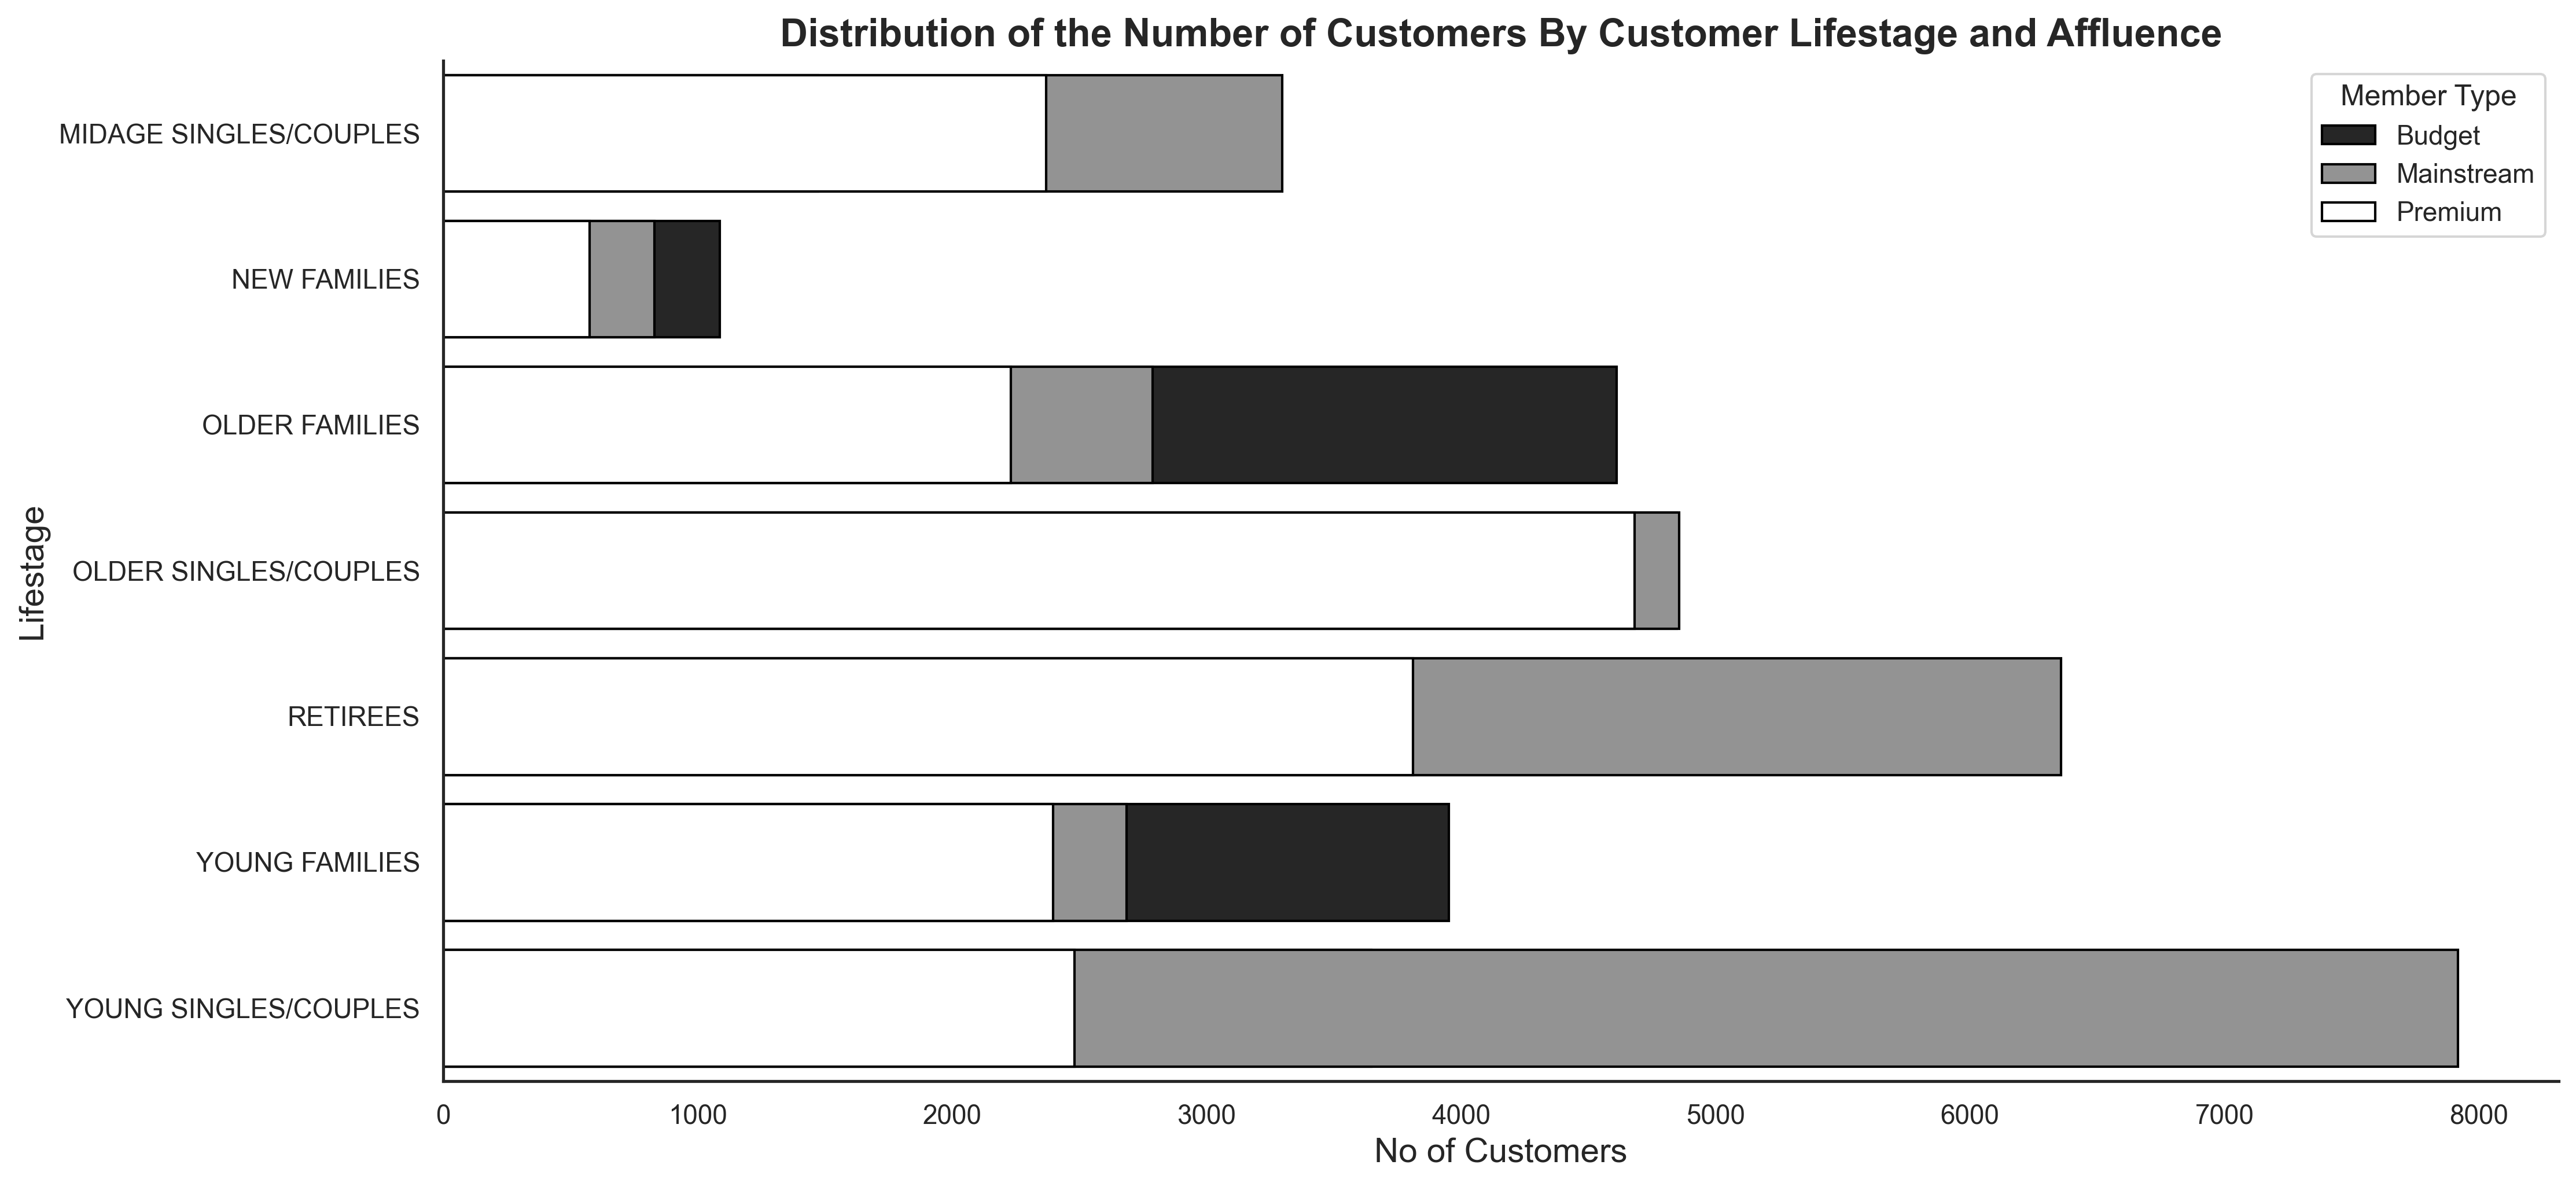

In [50]:
rcParams['font.family'] = 'Roboto'

sns.set(style="white")
plt.figure(figsize=[15, 7], dpi=300)
sns.barplot(
    data=customers_by_segment,
    x='NUM_OF_CUSTOMERS',
    y='LIFESTAGE',
    hue='MEMBER_TYPE',
    orient='h',
    dodge=False,
    color="white",
    edgecolor="black"
)
plt.title('Distribution of the Number of Customers By Customer Lifestage and Affluence', fontweight='bold', fontsize=16)
plt.xlabel('No of Customers', fontsize=14)
plt.ylabel('Lifestage', fontsize=14)
plt.legend(title='Member Type')
plt.tight_layout()
plt.savefig('customers_by_segment_bw.png')
sns.despine()
plt.show()

There are more young singles/couples(mainstream and retires) who buy chips.

In [51]:
# 3. Chips bought per customer by segment-
chips_per_customer = complete_df.groupby(['LIFESTAGE', 'MEMBER_TYPE']).agg(
    TOTAL_CHIPS_BOUGHT = ('PROD_QTY', 'sum'),
    UNIQUE_CUSTOMERS = ('LYLTY_CARD_NBR', 'nunique')
)
chips_per_customer['CHIPS_PER_CUSTOMER'] = chips_per_customer['TOTAL_CHIPS_BOUGHT'] / chips_per_customer['UNIQUE_CUSTOMERS']
chips_per_customer = chips_per_customer.reset_index()

In [52]:
chips_per_customer

,LIFESTAGE,MEMBER_TYPE,TOTAL_CHIPS_BOUGHT,UNIQUE_CUSTOMERS,CHIPS_PER_CUSTOMER
0,MIDAGE SINGLES/COUPLES,Budget,8883,1474,6.026459
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,3298,6.432080
2,MIDAGE SINGLES/COUPLES,Premium,14400,2369,6.078514
3,NEW FAMILIES,Budget,5241,1087,4.821527
4,NEW FAMILIES,Mainstream,4060,830,4.891566
5,NEW FAMILIES,Premium,2769,575,4.815652
6,OLDER FAMILIES,Budget,41853,4611,9.076773
7,OLDER FAMILIES,Mainstream,25804,2788,9.255380
8,OLDER FAMILIES,Premium,20239,2231,9.071717
9,OLDER SINGLES/COUPLES,Budget,32883,4849,6.781398


C:\Users\Amiteshwar Singh\AppData\Local\Temp\ipykernel_7452\1617387132.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  sns.barplot(


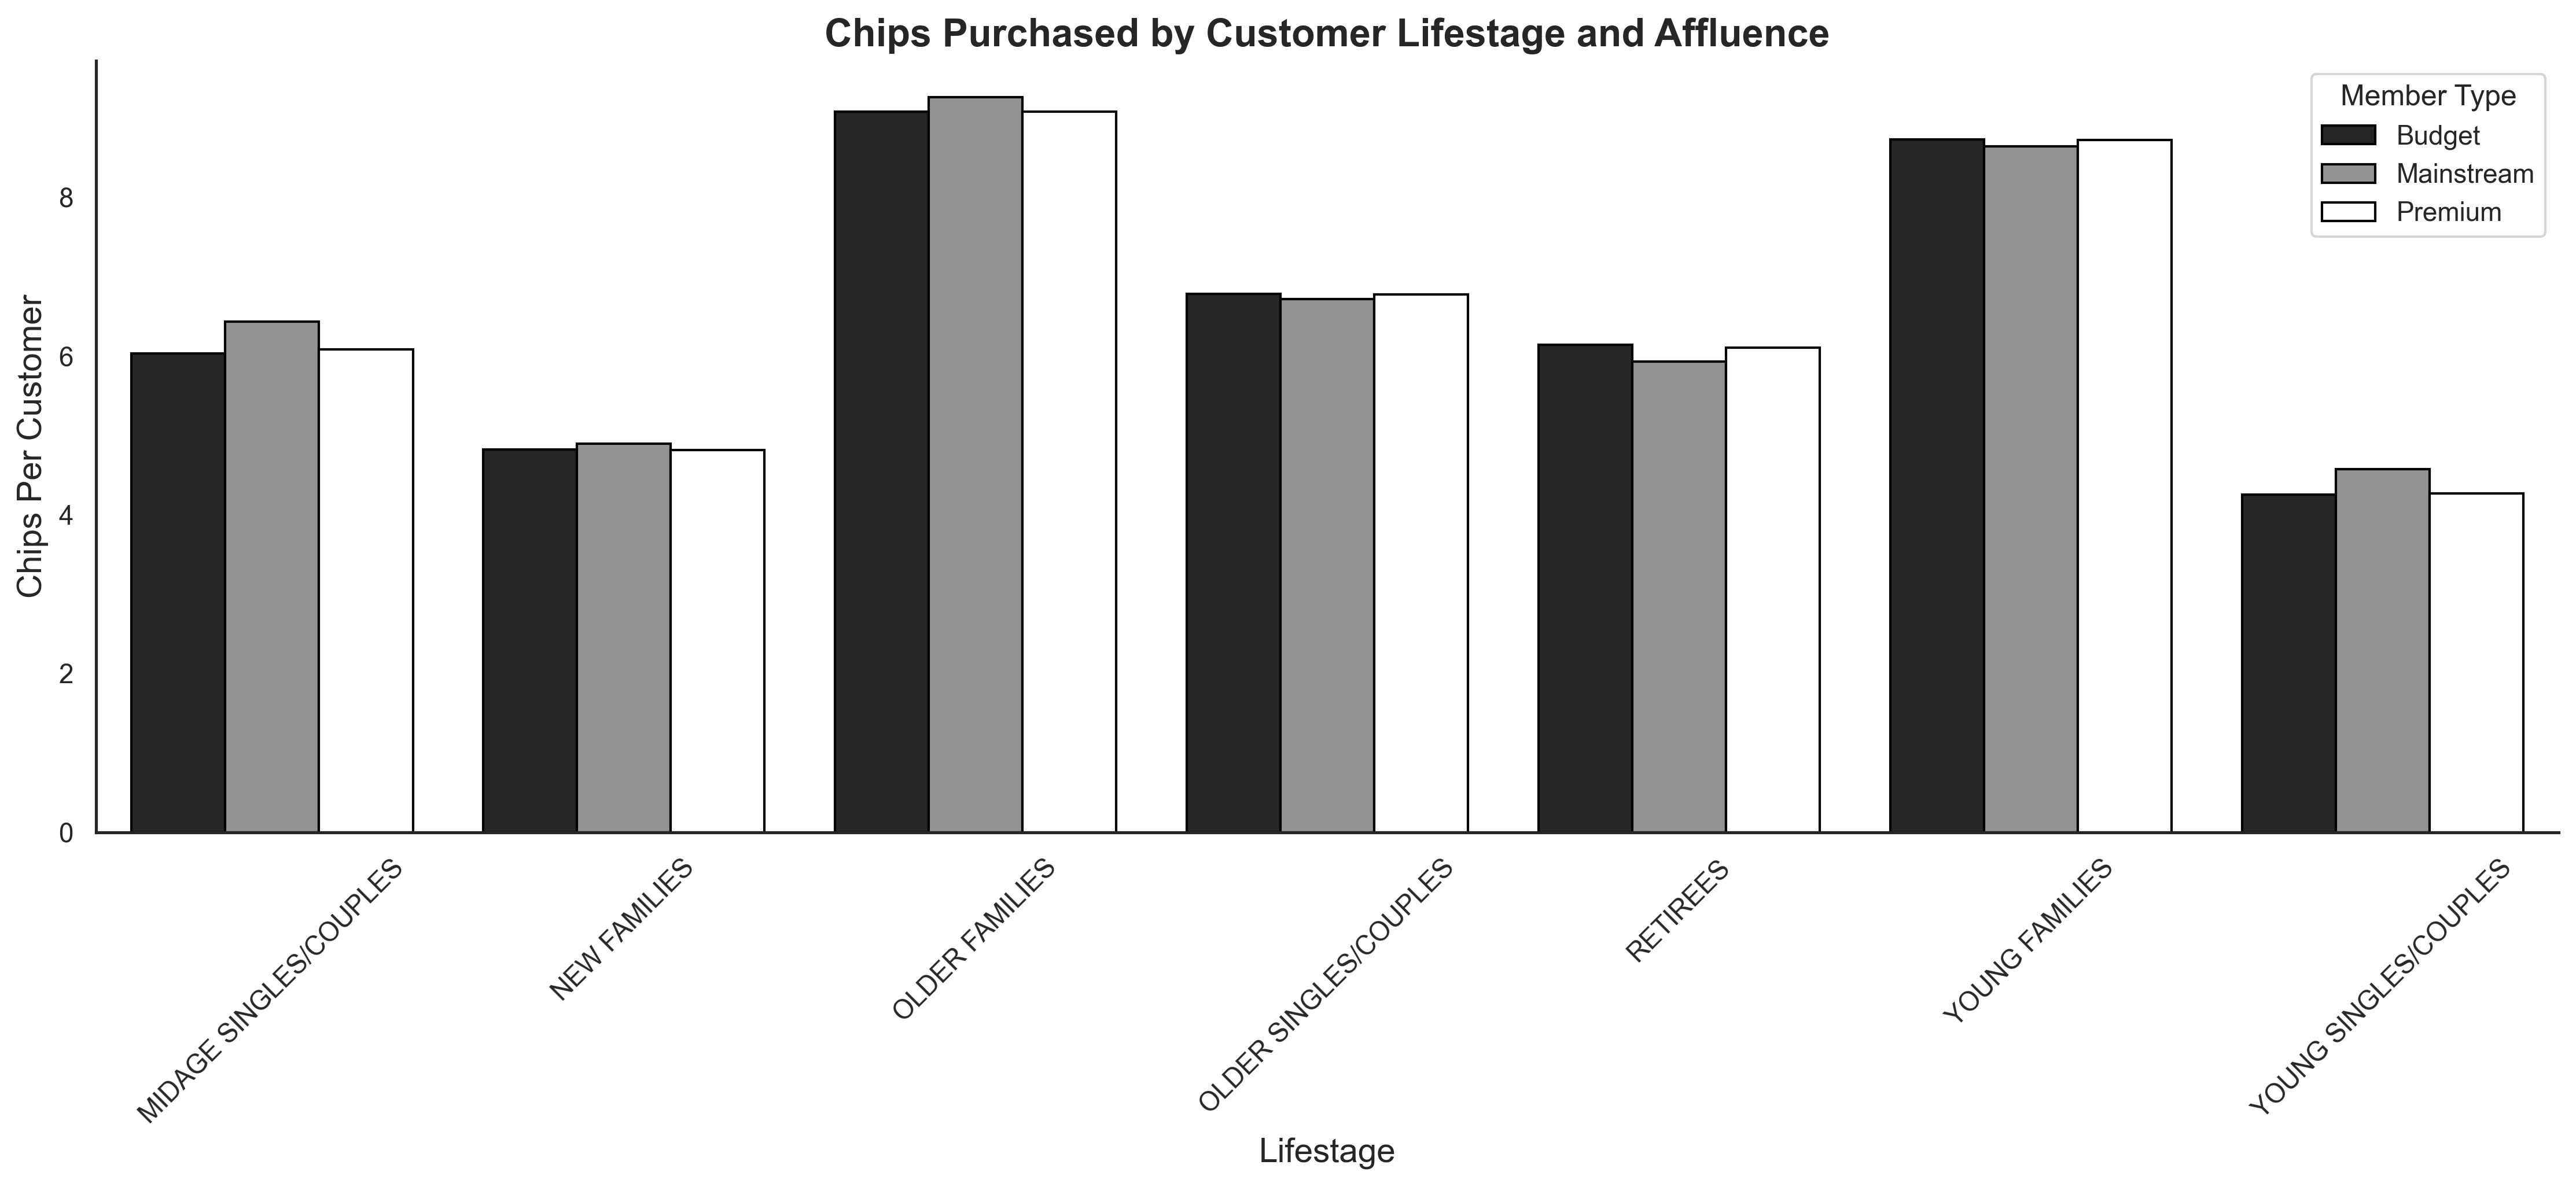

In [53]:
rcParams['font.family'] = 'Roboto'

sns.set(style="white")
plt.figure(figsize=(15, 7), dpi=300)
sns.barplot(
    data=chips_per_customer,
    x="LIFESTAGE",
    y="CHIPS_PER_CUSTOMER",
    hue="MEMBER_TYPE",
    color="white",
    edgecolor="black"
)
plt.title("Chips Purchased by Customer Lifestage and Affluence", fontsize=16, fontweight='bold')
plt.xlabel("Lifestage", fontsize=14)
plt.ylabel("Chips Per Customer", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Member Type")
plt.tight_layout()
plt.savefig('Chips_bought_per_customer_per_segment_bw.png')
sns.despine()
plt.show()

Older families and young families in general buy more chips per customer.

In [54]:
# 4. Average chip price by customer segment-
complete_df['CHIP_PRICE'] = complete_df['TOT_SALES'] / complete_df['PROD_QTY']

In [55]:
complete_df.head(1)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,MEMBER_TYPE,CHIP_PRICE
0,88140,2018-07-01,88,86914,25,Pringles SourCream Onion 134g,2,7.4,134.0,Pringles,MIDAGE SINGLES/COUPLES,Mainstream,3.7


In [56]:
average_chip_price = complete_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['CHIP_PRICE'].mean().reset_index()

In [57]:
average_chip_price

,LIFESTAGE,MEMBER_TYPE,CHIP_PRICE
0,MIDAGE SINGLES/COUPLES,Budget,3.743328
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
2,MIDAGE SINGLES/COUPLES,Premium,3.770698
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133
5,NEW FAMILIES,Premium,3.872110
6,OLDER FAMILIES,Budget,3.745340
7,OLDER FAMILIES,Mainstream,3.737077
8,OLDER FAMILIES,Premium,3.717000
9,OLDER SINGLES/COUPLES,Budget,3.882096


C:\Users\Amiteshwar Singh\AppData\Local\Temp\ipykernel_7452\3953679339.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  sns.barplot(


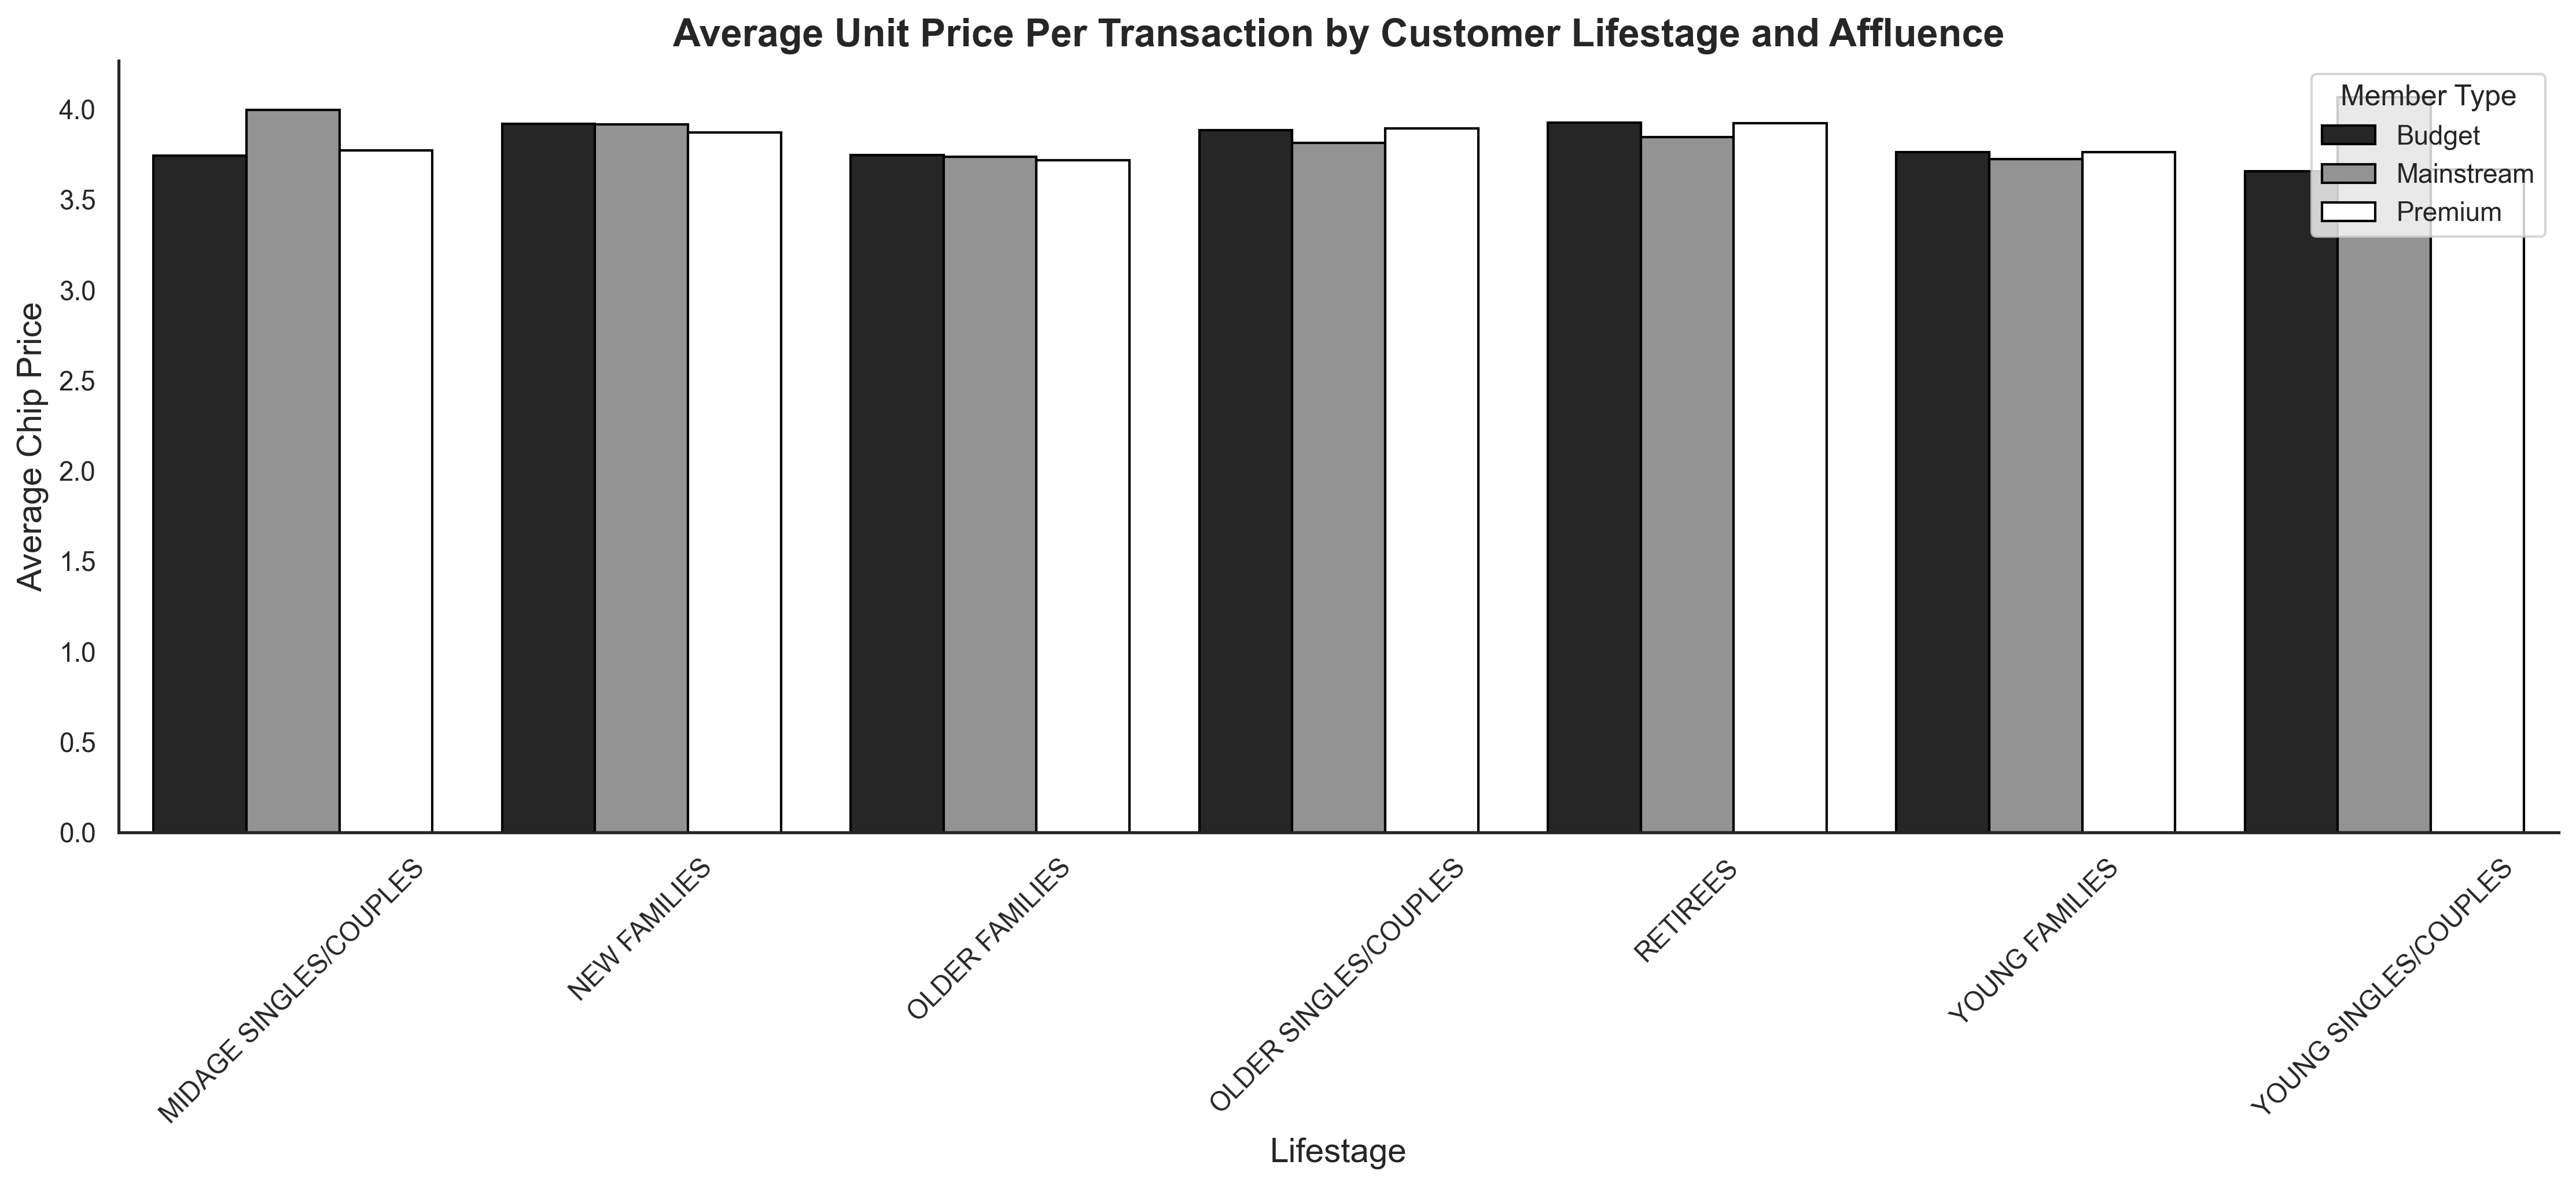

In [58]:
rcParams['font.family'] = 'Roboto'

sns.set(style="white")
plt.figure(figsize=(15, 7), dpi=300)
sns.barplot(
    data=average_chip_price,
    x="LIFESTAGE",
    y="CHIP_PRICE",
    hue="MEMBER_TYPE",
    color="white",
    edgecolor="black"
)
plt.title("Average Unit Price Per Transaction by Customer Lifestage and Affluence", fontsize=16, fontweight='bold')
plt.xlabel("Lifestage", fontsize=14)
plt.ylabel("Average Chip Price", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Member Type")
plt.tight_layout()
plt.savefig('Average_chip_price_bw.png')
sns.despine()
plt.show()

For young and midage singles/couples, (mainstream) are more willing to pay more for a packet of chips than their budget and premium counterpart.
Given the total sales, as well as the number of customers buying chips, is higher in these groups compared to the non-mainstream groups, this suggests that chips may not be the choice of snack for these groups.
Further information on shopping habits would be useful in this case.

## T-Test

In [59]:
from scipy.stats import ttest_ind

In [60]:
mainstream = complete_df["MEMBER_TYPE"] == "Mainstream"
young_midage = (complete_df["LIFESTAGE"] == 'MIDAGE SINGLES/COUPLES') | (complete_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES")
premium_budget = complete_df["MEMBER_TYPE"] != "Mainstream"

In [61]:
group_1 = complete_df[mainstream & young_midage]["CHIP_PRICE"]
group_2 = complete_df[premium_budget & young_midage]["CHIP_PRICE"]
stat, pval = ttest_ind(group_1.values, group_2.values, equal_var=False)
print(f"P-value: {pval}, T-statistic: {stat}")

P-value: 6.967354233018139e-306, T-statistic: 37.6243885962295


Since both the p-value is extremely low and the t-statistic is large, the data strongly suggests that the price between the "Mainstream" and "Premium/Budget" groups for "Young/Mid-age Singles/Couples" is significantly different.

## Deep Dive into Specific Customer Segments for Insights


We have found quite a few interesting insights. We might want to target customer segments that contribute the most to sales to retain them or further increase sales.

Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.

In [62]:
young_mainstream = complete_df.loc[complete_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]
young_mainstream = young_mainstream.loc[young_mainstream['MEMBER_TYPE'] == "Mainstream"]
young_mainstream_brandname = young_mainstream['BRAND_NAME'].value_counts().sort_values(ascending=False)

C:\Users\Amiteshwar Singh\AppData\Local\Temp\ipykernel_7452\1699404881.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


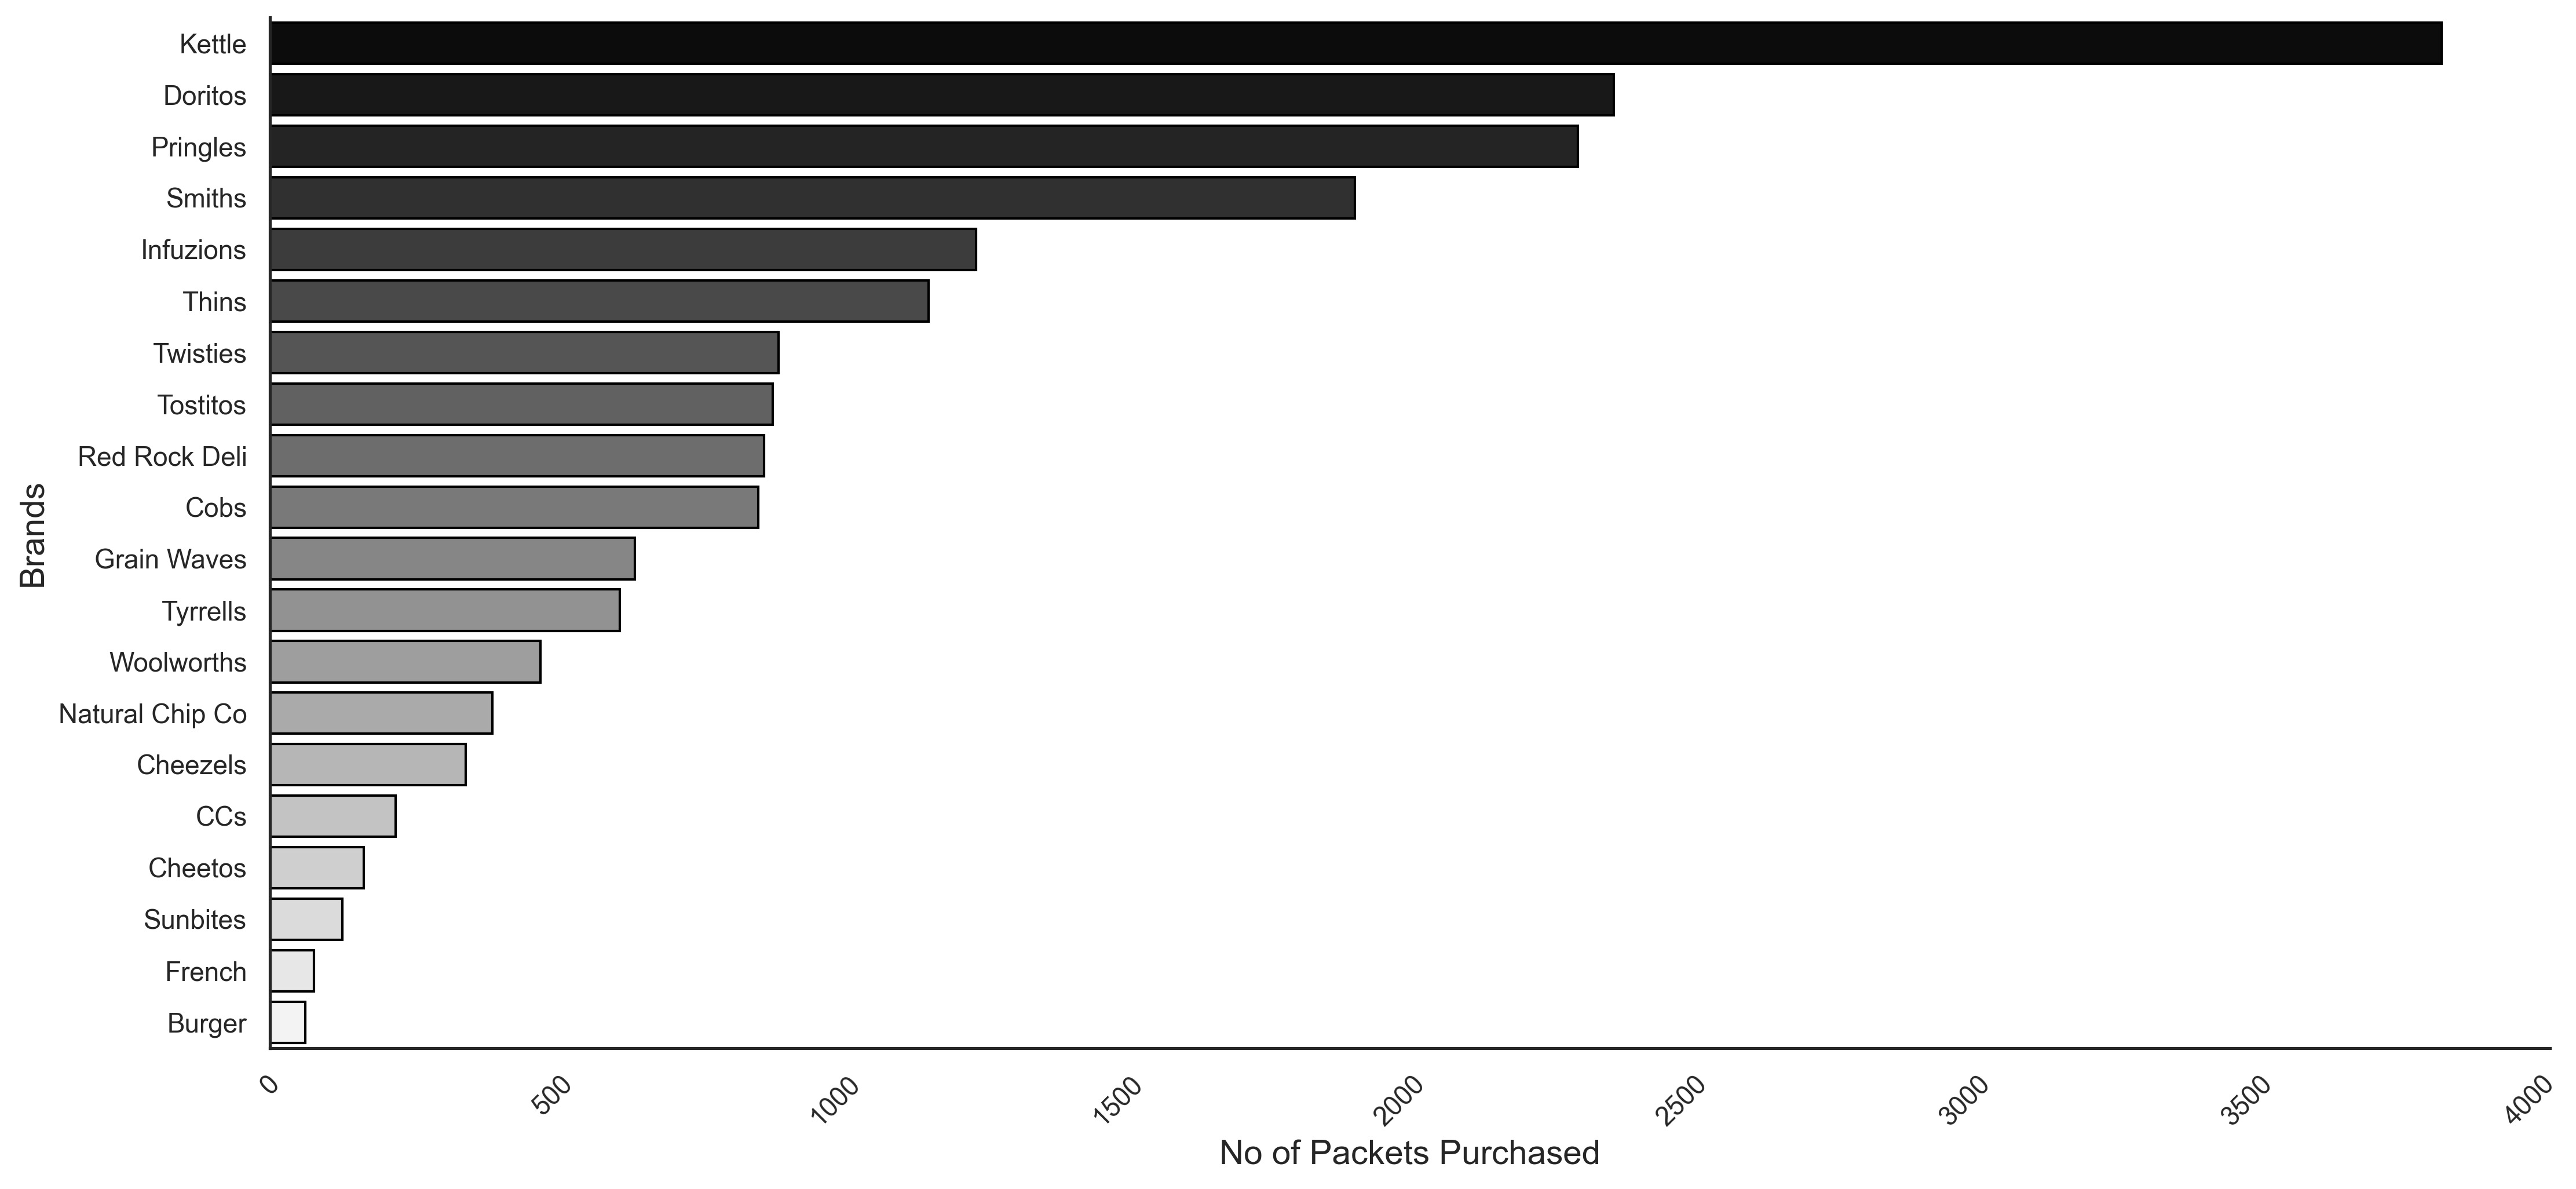

In [63]:
rcParams['font.family'] = 'Roboto'

sns.set(style="white")
plt.figure(figsize=(15, 7), dpi=300)
sns.barplot(
    data=young_mainstream_brandname,
    palette="gray",  
    edgecolor="black",
    orient='h'
)
plt.xlabel("No of Packets Purchased", fontsize=14)
plt.ylabel("Brands", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('topbrand_bw.png')
sns.despine()
plt.show()

In [64]:
temp = complete_df.copy()
temp["group"] = temp["LIFESTAGE"] + ' - ' + temp['MEMBER_TYPE']

In [65]:
groups = pd.get_dummies(temp["group"], dtype='float')
brands = pd.get_dummies(temp["BRAND_NAME"], dtype='float')
groups_brands = groups.join(brands)
groups_brands

,MIDAGE SINGLES/COUPLES - Budget,MIDAGE SINGLES/COUPLES - Mainstream,MIDAGE SINGLES/COUPLES - Premium,NEW FAMILIES - Budget,NEW FAMILIES - Mainstream,NEW FAMILIES - Premium,OLDER FAMILIES - Budget,OLDER FAMILIES - Mainstream,OLDER FAMILIES - Premium,OLDER SINGLES/COUPLES - Budget,...,Natural Chip Co,Pringles,Red Rock Deli,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

freq_groupsbrands = apriori(groups_brands, min_support=0.008, use_colnames=True)
rules = association_rules(freq_groupsbrands, metric="lift", min_threshold=0.5, num_itemsets=int)
rules.sort_values('confidence', ascending = False, inplace = True)

C:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [67]:
set_temp = temp["group"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
41,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,1.0,0.002325,1.036537,0.162062,0.067453,0.035249,0.144893
0,(MIDAGE SINGLES/COUPLES - Mainstream),(Kettle),0.044966,0.167334,0.008657,0.192519,1.150508,1.0,0.001132,1.031190,0.136978,0.042510,0.030246,0.122127
23,(RETIREES - Budget),(Kettle),0.057652,0.167334,0.010505,0.182214,1.088926,1.0,0.000858,1.018196,0.086660,0.048979,0.017871,0.122496
33,(RETIREES - Premium),(Kettle),0.049591,0.167334,0.008981,0.181105,1.082296,1.0,0.000683,1.016816,0.080006,0.043190,0.016538,0.117388
12,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069596,0.167334,0.012422,0.178488,1.066658,1.0,0.000776,1.013578,0.067167,0.055330,0.013396,0.126361
20,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067115,0.167334,0.011944,0.177959,1.063495,1.0,0.000713,1.012925,0.064000,0.053678,0.012760,0.124668
26,(RETIREES - Mainstream),(Kettle),0.080935,0.167334,0.013723,0.169554,1.013269,1.0,0.000180,1.002674,0.014248,0.058508,0.002666,0.125782
17,(OLDER SINGLES/COUPLES - Mainstream),(Kettle),0.069146,0.167334,0.011490,0.166168,0.993034,1.0,-0.000081,0.998602,-0.007479,0.051068,-0.001400,0.117416
34,(YOUNG FAMILIES - Budget),(Kettle),0.071991,0.167334,0.011117,0.154422,0.922837,1.0,-0.000930,0.984730,-0.082654,0.048714,-0.015507,0.110429
4,(OLDER FAMILIES - Budget),(Kettle),0.087193,0.167334,0.013455,0.154318,0.922216,1.0,-0.001135,0.984609,-0.084586,0.055815,-0.015632,0.117364


In [68]:
rules[rules['antecedents'] == {'YOUNG SINGLES/COUPLES - Mainstream'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
41,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,1.0,0.002325,1.036537,0.162062,0.067453,0.035249,0.144893
39,(YOUNG SINGLES/COUPLES - Mainstream),(Doritos),0.079209,0.102229,0.009642,0.121725,1.190712,1.0,0.001544,1.022198,0.173944,0.056123,0.021716,0.108020
43,(YOUNG SINGLES/COUPLES - Mainstream),(Pringles),0.079209,0.101735,0.009382,0.118451,1.164310,1.0,0.001324,1.018962,0.153262,0.054688,0.018609,0.105337


From apriori analysis, we can see that for Mainstream - young singles/couples, Kettle is the brand of choice.
This is also true for most other segments. We can use the affinity index to see if there are brands this segment prefers more than the other segments to target.

In [69]:
target_segment = complete_df[(complete_df["LIFESTAGE"] == "YOUNG SINGLES/COUPLES") & (complete_df["MEMBER_TYPE"] == "Mainstream")]
target_proportions = target_segment["BRAND_NAME"].value_counts() / target_segment["PROD_QTY"].sum()

In [70]:
other_segment = complete_df[(complete_df["LIFESTAGE"] != "YOUNG SINGLES/COUPLES") | (complete_df["MEMBER_TYPE"] != "Mainstream")]
other_proportions = other_segment["BRAND_NAME"].value_counts() / other_segment["PROD_QTY"].sum()

In [71]:
brand_proportions = pd.DataFrame({'target': target_proportions, 'other': other_proportions}).fillna(0)
brand_proportions['affinity'] = brand_proportions['target'] / brand_proportions['other']

In [72]:
brand_proportions_sorted = brand_proportions.sort_values(by='affinity', ascending=False)
brand_proportions_sorted

,target,other,affinity
BRAND_NAME,,,
Tyrrells,0.017088,0.013412,1.274088
Twisties,0.024845,0.019702,1.261039
Doritos,0.065673,0.052617,1.248127
Tostitos,0.024569,0.019764,1.243104
Kettle,0.106115,0.086242,1.230429
Pringles,0.063906,0.052484,1.217641
Cobs,0.023851,0.020335,1.172891
Infuzions,0.034507,0.029829,1.156810
Grain Waves,0.017833,0.016339,1.091432


By using the affinity index, we can see that mainstream young singles/couples are 28% more likely to purcahse Tyrrells chips than the other segments. However, they are 50% less likely to purchase Burger Rings.

We also want to find out if our target segment tends to buy larger packs of chips.

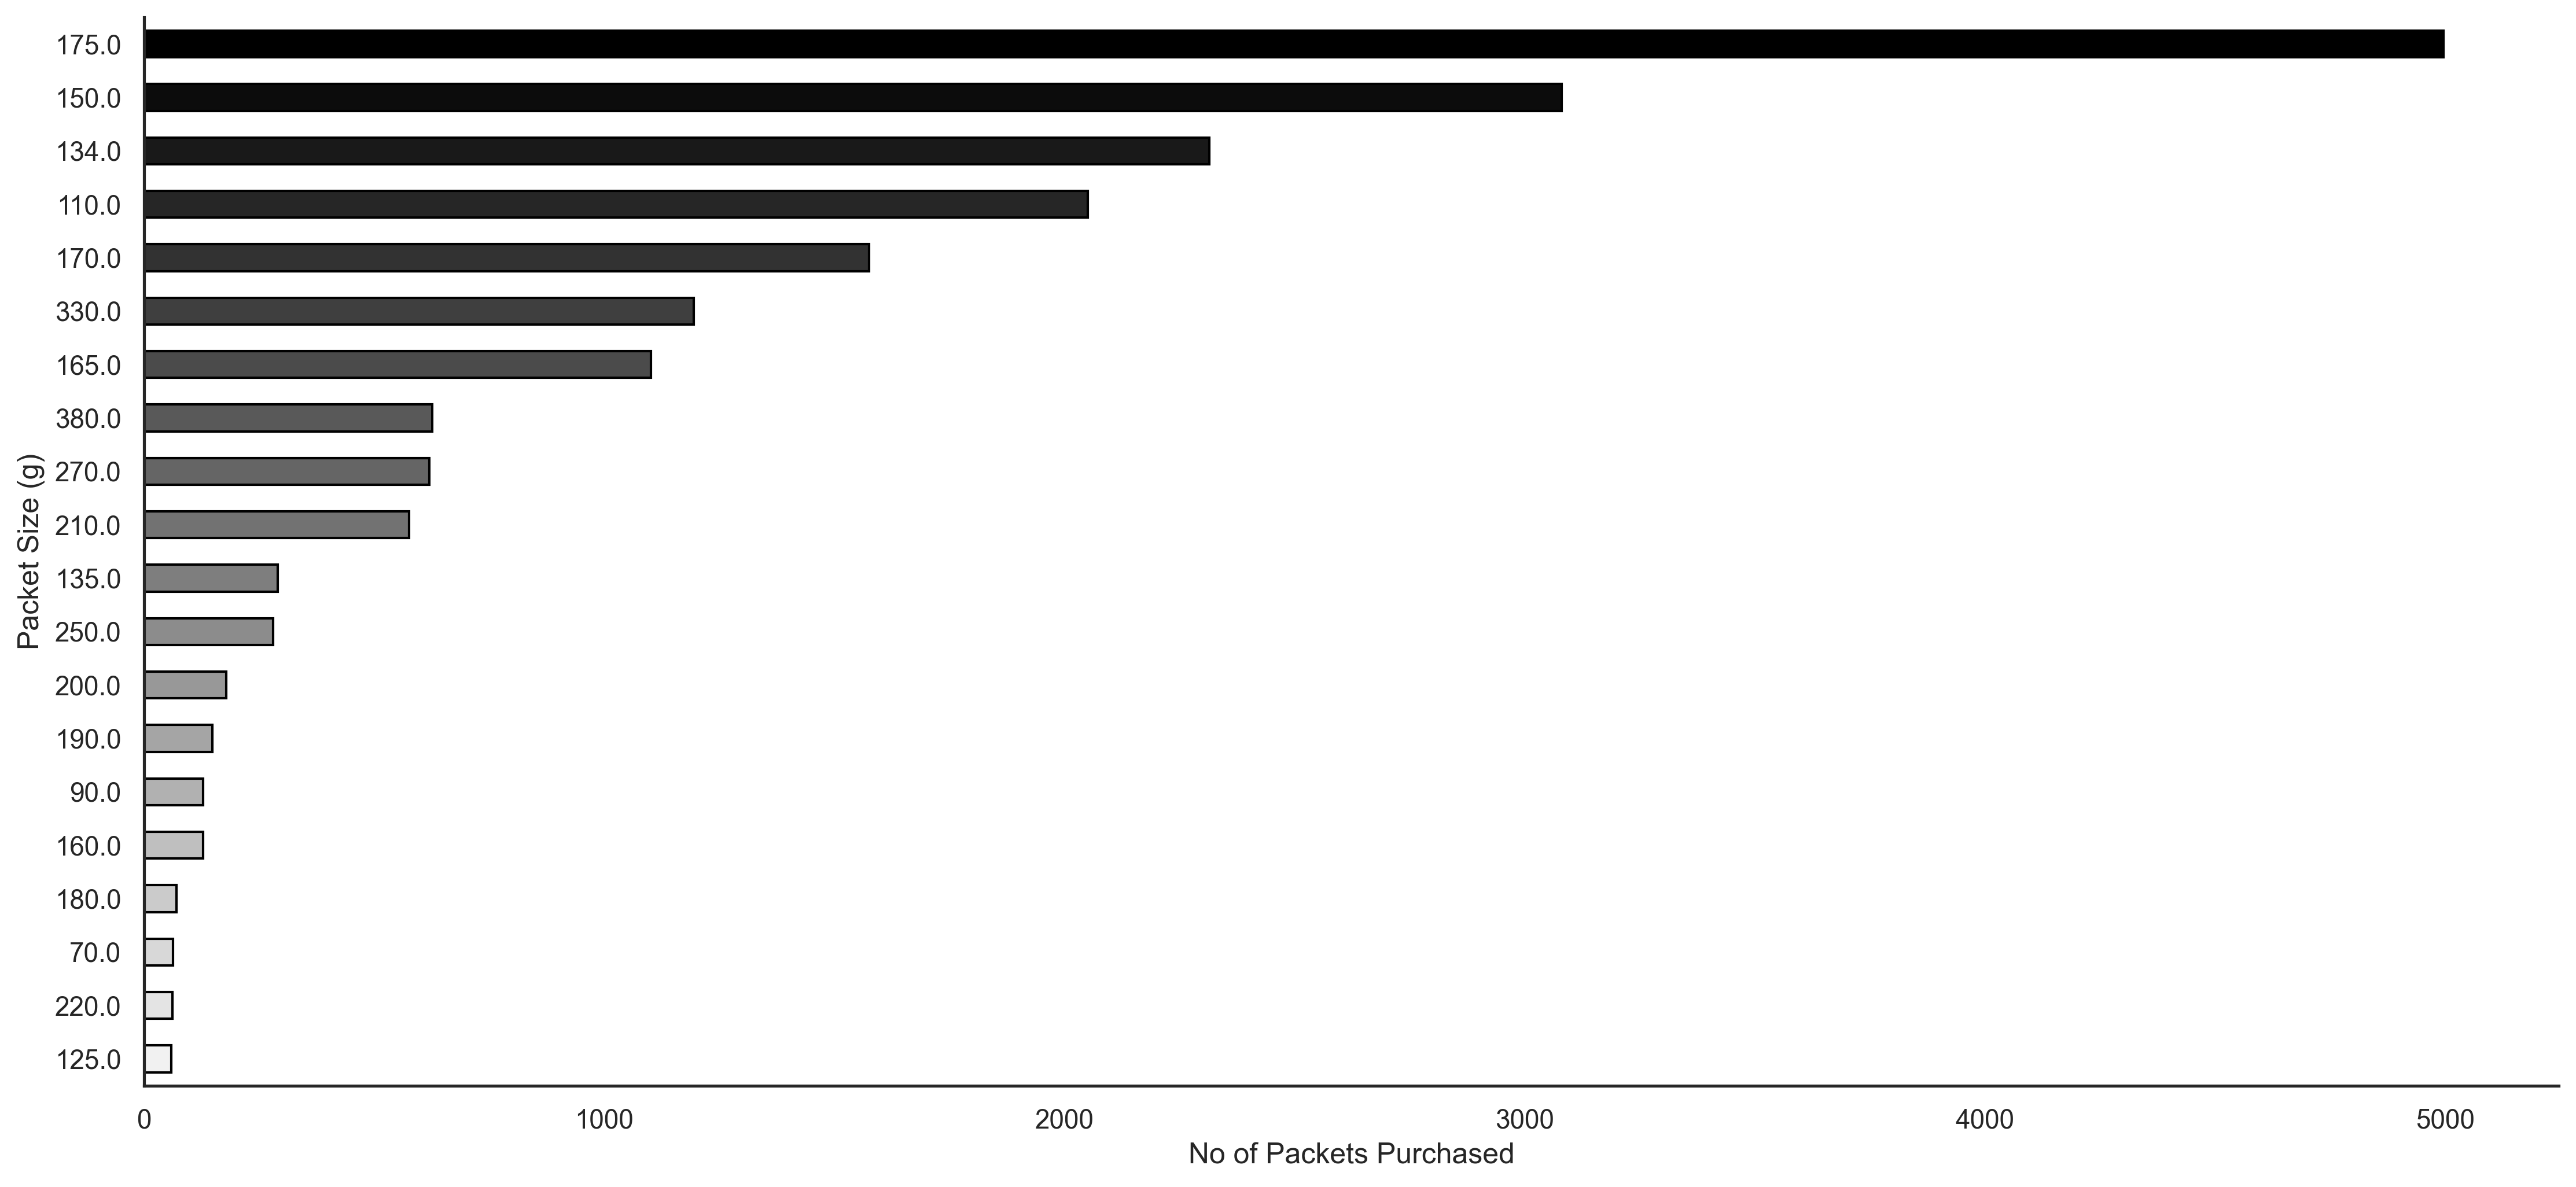

In [73]:
young_mainstream = complete_df.loc[complete_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"].copy()
young_mainstream = young_mainstream.loc[young_mainstream['MEMBER_TYPE'] == "Mainstream"].copy()

rcParams['font.family'] = 'Roboto'

value_counts = young_mainstream["PACK_SIZE"].value_counts().sort_values(ascending=True)
n_colors = len(value_counts)
gradient_palette = sns.light_palette("black", n_colors=n_colors, reverse=False, as_cmap=False)
sns.set(style="white")
plt.figure(figsize=(15, 7), dpi=300)
ax = value_counts.plot.barh(color=gradient_palette, edgecolor="black")

ax.set_ylabel("Packet Size (g)")
ax.set_xlabel("No of Packets Purchased")
plt.tight_layout()
plt.savefig('packsize_bw.png')
sns.despine()
plt.show()

## Top Contributing Segments to Sales

- Older Families - Budget
- Young Singles/Couples - Mainstream
- Retirees - Mainstream

Mainstream young singles/couples spend the most per purchase, are 28% more likely to buy Tyrells, 32% more likely to buy 270g Twisties. Kettles chips are the most popular across all groups. To boost sales, position Tyrells and Twisties near Kettles for visibility, especially targeting mainstream young singles/couples, and consider resizing Burger Rings to align with the favored 175g/270g sizes.